## Random Forests - Visualization

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
# import pydotplus

from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.core.display import display, HTML

from lib import RandomForestHelper as RFH
from lib import RFGraph

%pylab inline
%config IPCompleter.greedy=True

Populating the interactive namespace from numpy and matplotlib


## Example

<img alt="" src="Random-Forest-Introduction.jpg" style="width:900px" />

### Main Parameters for a Random Forest:

* **n_estimators** - number of trees

* **max_features** - maximal number of features used when learning a split.

* **max_depth** - Maximal tree depth

For a full description of all parameters see [Reference](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [2]:
D=datasets.load_digits()
D.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(D.data, D.target, test_size=0.5)

## The random forest classifier

Parameters being changed:
1. **Max_depth**: The deepest level to which a decision tree can go to
2. **n_estimators**: The number of decision trees that are generated and eventually used for majority voting

In [4]:
rf = RandomForestClassifier(max_depth=2, n_estimators=7)
rf = rf.fit(X_train,y_train)

In [5]:
from lib import RFGraph

In [6]:
for i in [0]:
    RFGraph.generate_tree(rf, i) #ith Decision Tree: Where i is the Decision Tree number according to the above table)

Decision Tree 0 : 


InvocationException: GraphViz's executables not found

## Predicting Category

1. Different decision trees are generated from the input data.
2. For each sample, the category is decided based on the decision tree.
3. The final prediction is done by some form of ensemble learning on the outputs of the different trees. In this scenario, we use majority voting (Category that gets the most votes is predicted).

In [7]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
rf = rf.fit(X_train,y_train)

In [8]:
pred, final_pred = RFH.predict_category(rf, X_test)
#html = RFGraph.generate_html(rf, X_test, np.concatenate((pred, final_pred), axis=1)) #Adding prediction to show in the table
#HTML(html)

In [9]:
labels=np.array([3,5,8])

rev_lookup = {labels[i]:i for i in range(3)}
choose = y_test*0
for i in range(3):
    choose+=1*(y_test==labels[i])
pred_3=pred[choose>0,:]
y_test_3=np.array([rev_lookup[x] for x in y_test[choose>0]])
#pred_3.shape,pred.shape,y_test_3

In [10]:
p=np.zeros([pred_3.shape[0],3])
for i in range(3):
    p[:,i]=np.sum(pred_3==labels[i],axis=1)

In [11]:
highest=np.argmax(p,axis=1)
highest

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2,
       2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2,
       1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1,
       0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0,
       1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2,
       2, 2, 1, 1])

In [12]:
predicted_label=np.array([labels[x] for x in highest])
predicted_label
y_test_3

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2,
       1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1,
       0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0,
       1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2,
       2, 2, 1, 1])

In [13]:
mistakes=highest != y_test_3
mistakes

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [14]:
print('counter\t index\t [%3d %4d %4d ]   prediction true'%(labels[0],labels[1],labels[2]))
print('='*55)
j=0
for i in range(len(y_test_3)):
    if mistakes[i]:
        j+=1
        print(j,'\t',i,'\t',p[i,:],'\t',highest[i],'\t',y_test_3[i])

counter	 index	 [  3    5    8 ]   prediction true
1 	 15 	 [ 11.  14.  18.] 	 2 	 0
2 	 42 	 [ 25.   3.  21.] 	 0 	 2
3 	 70 	 [ 24.   2.  39.] 	 2 	 0
4 	 118 	 [ 49.  13.   4.] 	 0 	 1
5 	 129 	 [ 12.   9.  14.] 	 2 	 0
6 	 186 	 [ 14.   3.  14.] 	 0 	 2
7 	 246 	 [ 20.  30.   8.] 	 1 	 0
8 	 251 	 [ 15.  17.  13.] 	 1 	 0


In [15]:
p=p+np.abs(np.random.normal(0,0.01,size=p.shape))
Z=1/(np.sum(p,axis=1)+0.0001)
p=(p.transpose()*Z).transpose()

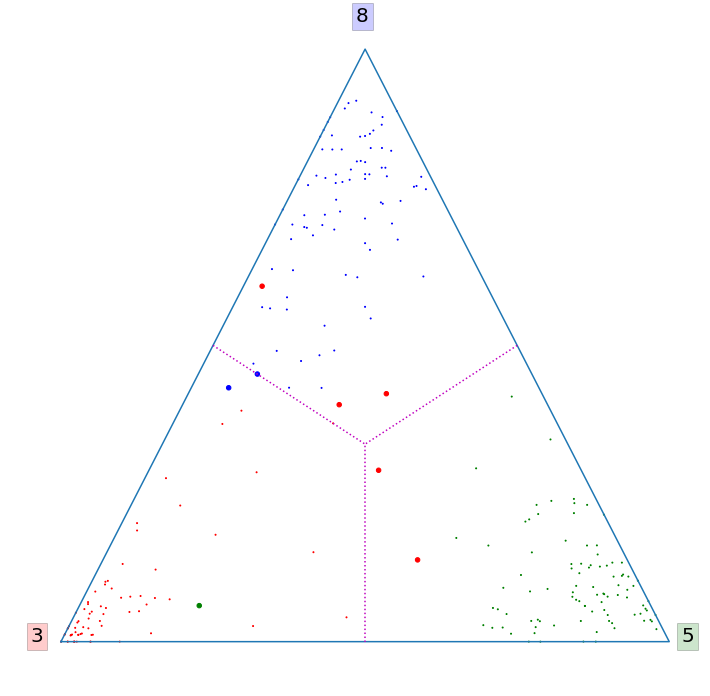

In [16]:
RFGraph.generate_simplex(p,y_test_3,mistakes,labels)